In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

from config import PARQUET_FILE

In [2]:
df = spark.read.parquet(PARQUET_FILE)

In [3]:
df.createOrReplaceTempView("washing")
# spark.sql("""
# SELECT *
# FROM washing
# LIMIT 10
# """).show()

In [4]:
def getSample():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    return df.sample(False, 0.1)

In [8]:
def getListForHistogramAndBoxPlot():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    result = spark.sql("""
    SELECT temperature
    FROM washing
    WHERE temperature is not null
    """)
    result_arr = result.rdd.map(lambda row: row.temperature).collect()
    if not type(result_arr)==list:
        raise Exception('return type not a list')
    return result_arr

In [10]:
# should return a tuple containing the two lists for timestamp and temperature
# please make sure you take only 10% of the data by sampling
# please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart():
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    double_tuple_rdd = spark.sql("""
    SELECT ts
    , temperature
    FROM washing
    WHERE temperature is not null
    ORDER BY ts asc
    """).sample(False,0.1).rdd.map(lambda row : (row.ts, row.temperature))
    
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    
    return (result_array_ts, result_array_temperature)

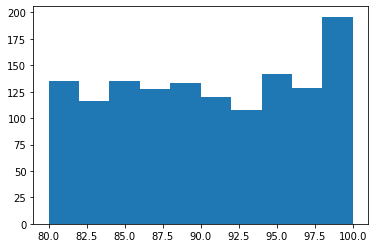

In [9]:
plt.hist(getListForHistogramAndBoxPlot())
plt.show()

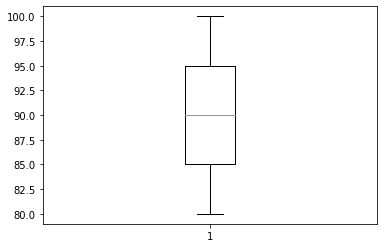

In [12]:
plt.boxplot(getListForHistogramAndBoxPlot())
plt.show()

In [11]:
lists = getListsForRunChart()

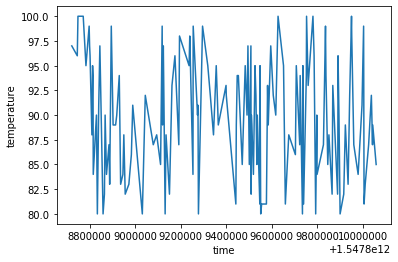

In [13]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [14]:
from rklib import submitAll

In [16]:
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = "otteromkram@gmail.com"
token = "MiNzJt0IO0hj8pem"


parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot())))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot()))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart())))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart()[0]))

submitAll(email, token, key, parts_data)


Submission successful, please check on the coursera grader page for the status
-------------------------
{"elements":[{"itemId":"95cS6","id":"sUpST4RAEeawAApvKZgcCQ~95cS6~ANku3IM1EeqDfgqZbxWX3Q","courseId":"sUpST4RAEeawAApvKZgcCQ"}],"paging":{},"linked":{}}
-------------------------
